<a href="https://colab.research.google.com/github/sileyouhe/ECE7123-DL/blob/main/HW1_4_Improving_the_FashionMNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

# Get Fashion-MNIST dataset

In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



# Construct a data loader object

In [ ]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

# Set up our model

In [ ]:
class NeuralNetwork(torch.nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
            # first hidden layer 256 neurons with ReLU activations
            nn.Linear(28*28, 256),
            nn.ReLU(),
            # second hidden layer 128 neurons with ReLU activations
            nn.Linear(256, 128),
            nn.ReLU(),
            # Third hidden layer 64 neurons with ReLU activations
            nn.Linear(128, 64),
            nn.ReLU(),
            # output layer, 10 classes
            nn.Linear(64, 10),
        )

  def forward(self, x):
      x = self.flatten(x)
      logits = self.linear_relu_stack(x)
      return logits

net = NeuralNetwork().cuda()
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Train our network
The training is based on dl_demo1.ipynb  
https://github.com/chinmayhegde/dl-demos/blob/main/dl_demo1.ipynb

In [ ]:
train_loss_history = []
test_loss_history = []

# try 30 epoches
for epoch in range(30):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = net(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = net(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 1.8375403711409457, Test loss 1.0972274386199417
Epoch 1, Train loss 0.8485989393011085, Test loss 0.7916049387804263
Epoch 2, Train loss 0.669206613130661, Test loss 0.6565224008195719
Epoch 3, Train loss 0.5894295005465368, Test loss 0.6097178614822922
Epoch 4, Train loss 0.5412889791450013, Test loss 0.5560615734689555
Epoch 5, Train loss 0.5074542275210941, Test loss 0.5198303261759935
Epoch 6, Train loss 0.482127203473023, Test loss 0.5469070088331867
Epoch 7, Train loss 0.46203857039147095, Test loss 0.490180236328939
Epoch 8, Train loss 0.44805870645208906, Test loss 0.47369750517948417
Epoch 9, Train loss 0.43537794110744493, Test loss 0.48295200953058376
Epoch 10, Train loss 0.42214367611766623, Test loss 0.44762518157245246
Epoch 11, Train loss 0.411767607098068, Test loss 0.44741007419908124
Epoch 12, Train loss 0.40293174975716484, Test loss 0.4375224399149038
Epoch 13, Train loss 0.39271149965428087, Test loss 0.46350459052119286
Epoch 14, Train loss 0.

# Display train- and test- loss curves

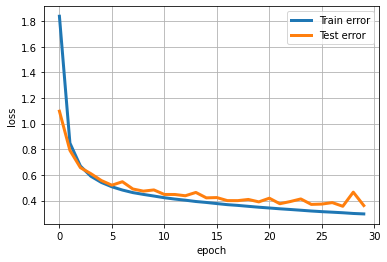

In [ ]:

plt.plot(range(30),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(30),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()


# Display accuracies of the final model

In [ ]:
acc_final_train = train_loss_history[-1]
acc_final_test = test_loss_history[-1]
print("train accuracy of the final model: ", acc_final_train)
print("test accuracy of the final model: ", acc_final_test)

train accuracy of the final model:  0.2958960863414095
test accuracy of the final model:  0.36111569945599625


## All of the 3 image samples are being classified correctly.

Predicted Class Probabilities: 
 tensor([[ -1.1731,  -8.3742,  -4.6655,  -1.7235,  -4.0515,   4.4237,  -0.7009,
           5.3406,   2.4380,   8.7110],
        [  4.8306,   1.7560,  14.6373,  -0.1666,   7.9924,  -3.8059,   8.8408,
         -19.8481,  -0.5167, -15.3459],
        [  5.9638,  16.2340,   3.1802,   3.8592,   3.7602,  -9.6367,   0.1715,
          -6.9443,  -2.6912, -12.4714]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

Predicted class: 
 torch.return_types.max(
values=tensor([ 8.7110, 14.6373, 16.2340], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([9, 2, 1], device='cuda:0'))

Real Class: 
 tensor([9, 2, 1], device='cuda:0')


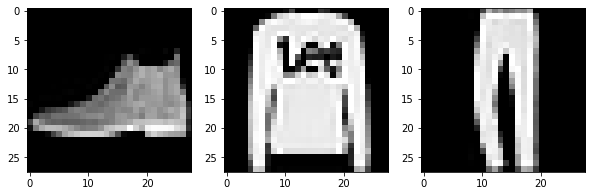

In [ ]:
#  draw any 3 image samples from the test dataset
# visualize the predicted class probabilities for each sample
test_features, test_labels = next(iter(testDataLoader))
image_samples = test_features[:3].cuda()
label_samples = test_labels[:3].cuda()

predicted_output = net(image_samples)
fit = Loss(predicted_output, label_samples)
print("Predicted Class Probabilities: \n", predicted_output)
print()
print("Predicted class: \n", torch.max(predicted_output, 1))
print()
print("Real Class: \n",label_samples)

plt.figure(figsize=(10,10))
for index in np.arange(0,3):
  plt.subplot(1,3,index+1)
  plt.imshow(test_features[index].squeeze().numpy(),cmap=plt.cm.gray)
  label = test_labels[index]

# Saving Model

In [ ]:
torch.save(net.state_dict(), "model_hw1-4.pth")
print("Saved PyTorch Model State to model_hw1-4.pth")

Saved PyTorch Model State to model_hw1-4.pth
